In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/nadaalay/Heart-Disease-Classifier-Web-App/master/data.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,1
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,1
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,1
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,1


In [3]:
data['target'].replace(to_replace=1,value=0,inplace=True)
data['target'].replace(to_replace=2,value=1,inplace=True)

In [4]:
df=data.copy()

In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [6]:
df.shape

(270, 14)

There are 14 features and 303 rows of data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
cp,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
trestbps,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
chol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
fbs,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
restecg,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
thalach,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
exang,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
oldpeak,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


# Check for null values

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Comment:-**There are no null values in any of the 14 features in the dataset

In [10]:
df['target'].value_counts()

0    150
1    120
Name: target, dtype: int64

# Percentage of patients with and without heart disease

In [11]:
df['target'].value_counts()/df.shape[0]*100

0    55.555556
1    44.444444
Name: target, dtype: float64

**Comment:-**
Out of total 45.54% of individual dont have heart disease whereas 54.45% have heart disease.So, the dataset is relatively balanced.

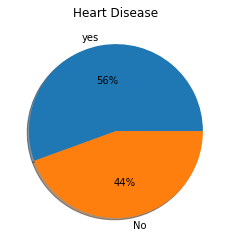

In [12]:
labels = ['yes', 'No']
values = df['target'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%',shadow=True)
plt.title('Heart Disease')
plt.show()

**Note:-**
According to initial analysis,the dataset contain 14 columns out of which 5 are numerical value column ans 9 are categorical value column.There are no missing values in this dataset and for Data balancing,the data is relatively balanced as 56% of the individuals in the dataset have heart disease

# Attributes Correlation

<AxesSubplot:>

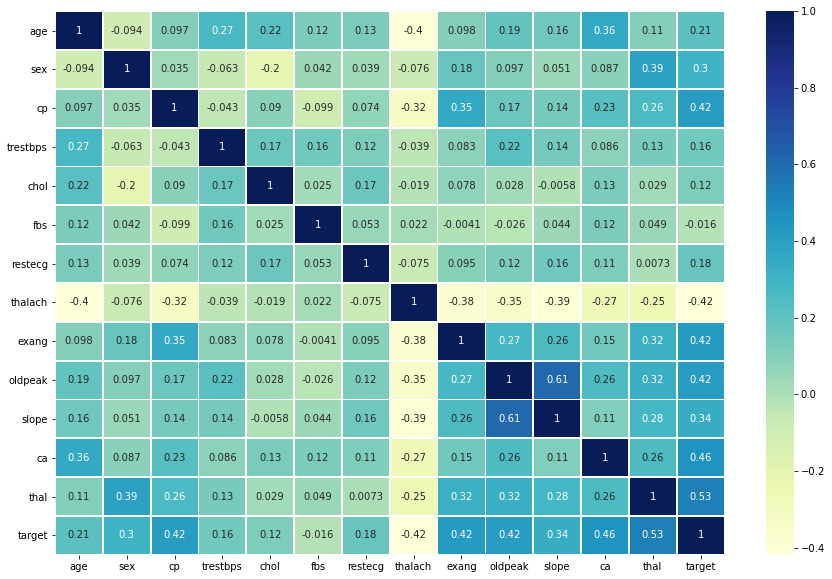

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.8,cmap="YlGnBu")

## Age Exploration

In [14]:
#Getting minimum and maximum age value
print("The minimum age :-",min(df['age']))
print("The maximum age :-",max(df['age']))
print("Averge age :- %.3f "%(df['age'].mean() ))


The minimum age :- 29
The maximum age :- 77
Averge age :- 54.433 


<AxesSubplot:xlabel='Age', ylabel='Density'>

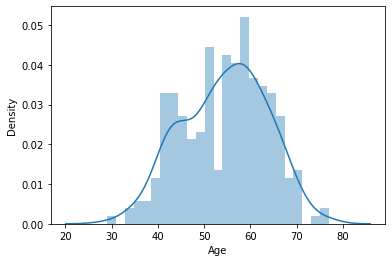

In [15]:
#Age distribution 
sns.distplot(df['age'],bins=25,axlabel="Age")

**Comment:-**
Age feature is normally distributes which is good

Text(0, 0.5, 'Frequency')

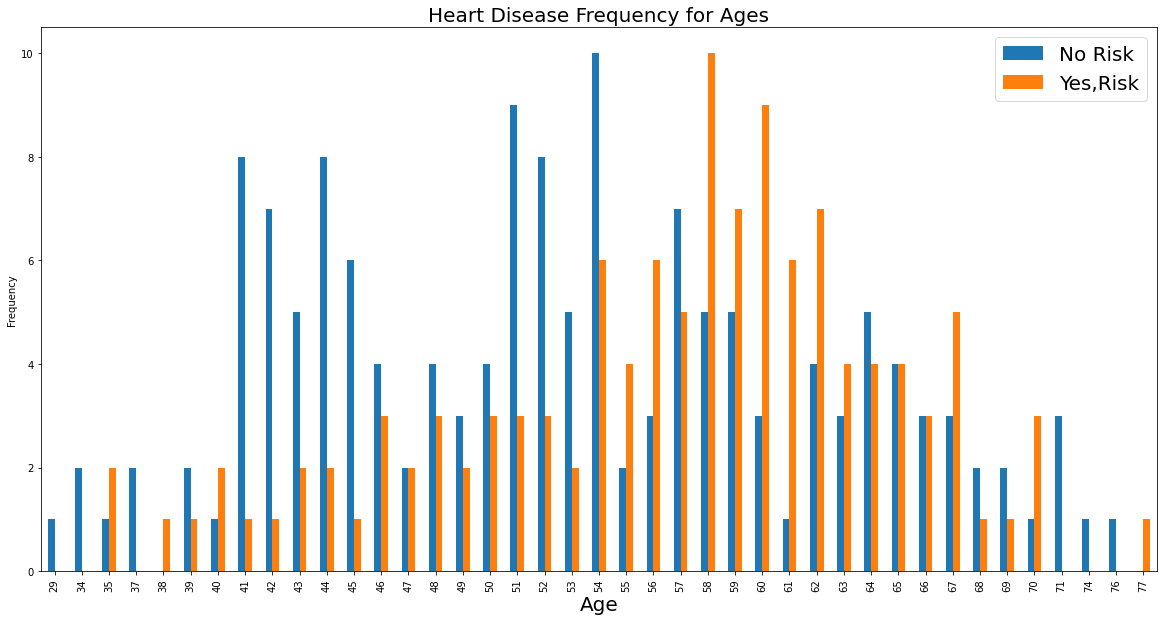

In [16]:
pd.crosstab(df['age'],df['target']).plot(kind='bar',figsize=(20,10))
plt.title('Heart Disease Frequency for Ages',fontsize=20)
plt.legend(["No Risk","Yes,Risk"],fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Frequency')

**Comment:-**From above graph we can say that the risk of heart disease is more in individuals of Age above 45 years

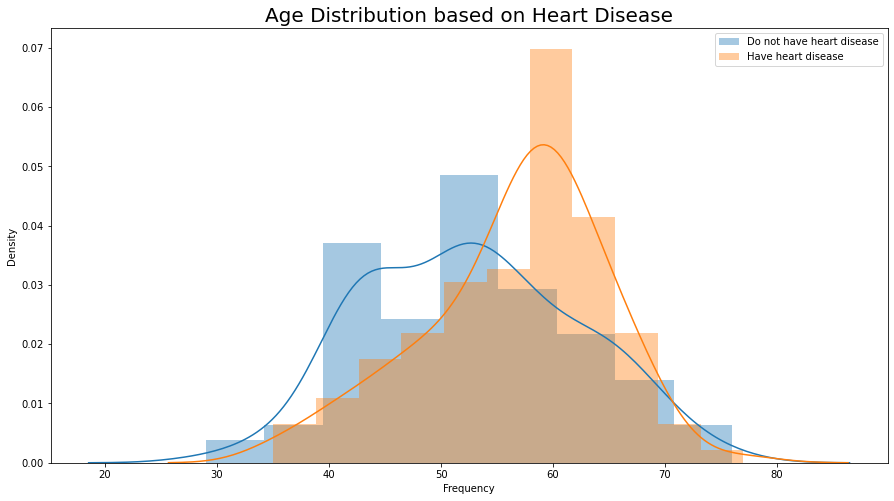

In [33]:
plt.figure(figsize=(15,8))
sns.distplot(df[df['target']==0]['age'],label='Do not have heart disease')
sns.distplot(df[df['target']==1]['age'],label="Have heart disease")
plt.xlabel('Frequency')
#plt.ylabel('Age',fontsize=15)
plt.title('Age Distribution based on Heart Disease',fontsize=20)
plt.legend()
plt.show()

**Comment:-**
Individual having heart disease are maximum in age group 55-65 years old

In [18]:
# Get min, max and average age of people do not have heart disease
print('Min Age of people who do not have heart disease: ', min(df[df['target'] == 0]['age']))
print('Max Age of people who do not have heart disease: ', max(df[df['target'] == 0]['age']))
print('Average Age of people who do not have heart disease: %.2f '%(df[df['target'] == 0]['age'].mean()))

Min Age of people who do not have heart disease:  29
Max Age of people who do not have heart disease:  76
Average Age of people who do not have heart disease: 52.71 


In [19]:
# Get min, max and average age of people who  have heart disease
print('Min Age of people who have heart disease: ', min(df[df['target'] == 1]['age']))
print('Max Age of people who have heart disease: ', max(df[df['target'] == 1]['age']))
print('Average Age of people who have heart disease: %.2f'%(df[df['target'] == 1]['age'].mean()))

Min Age of people who have heart disease:  35
Max Age of people who have heart disease:  77
Average Age of people who have heart disease: 56.59


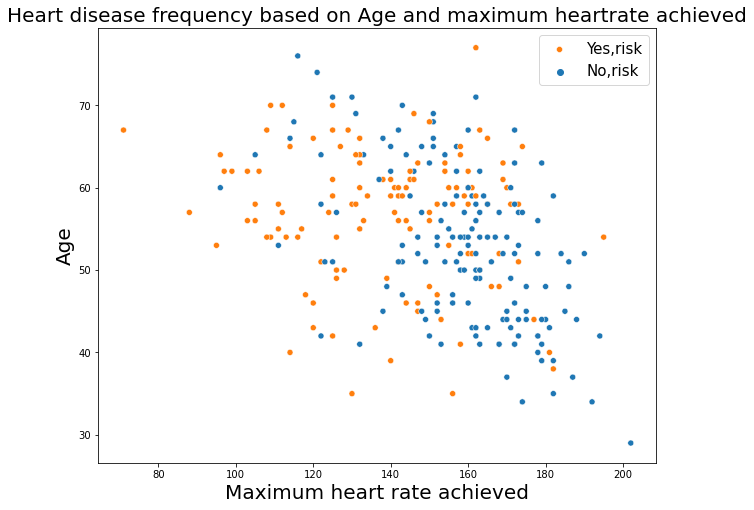

In [31]:
plt.figure(figsize=(10,8))
sns.scatterplot(y='age',x='thalach',data=df,hue='target')
plt.xlabel("Maximum heart rate achieved",fontsize=20)
plt.ylabel("Age",fontsize=20)
plt.title("Heart disease frequency based on Age and maximum heartrate achieved",fontsize=20)
plt.legend(['Yes,risk',"No,risk"],fontsize=15)

**Note:-**From above graph we could say that older people cannot achieve maximum heart rate as they are suffering from heart related issue

**Note:-**
From above analysis we can say that old individuals are move prone to heart related disease as compare to young people but there are some cases in which young individual also have heart related complications.

# Gender Exploration

Text(0.5, 0, 'Gender')

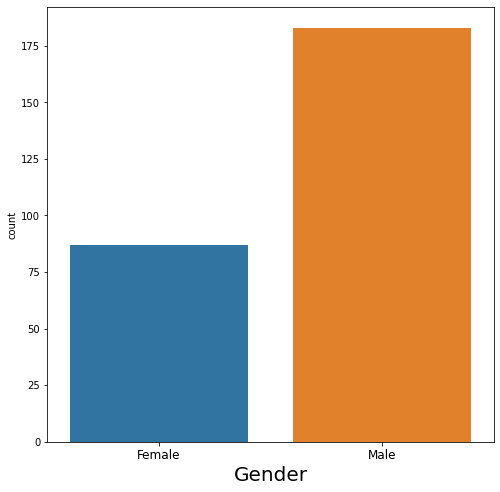

In [43]:
plt.figure(figsize=(8,8))
sns.countplot(x=df['sex'])
plt.xticks(np.arange(2),('Female',"Male"),fontsize=12)
plt.xlabel("Gender",fontsize=20)

<AxesSubplot:xlabel='age'>

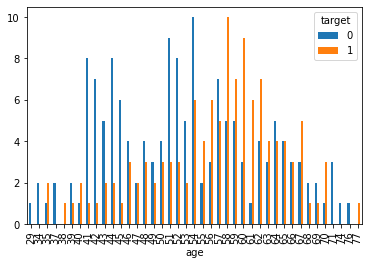

In [45]:
pd.crosstab(df['age'],df['target']).plot(kind='bar',h)

<AxesSubplot:xlabel='sex', ylabel='count'>

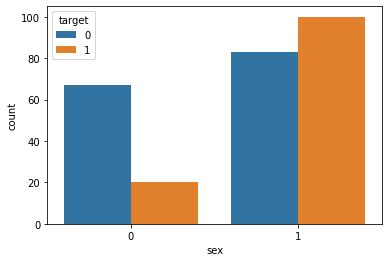

In [52]:
sns.countplot(x=df['sex'],hue=df['target'])

<AxesSubplot:xlabel='age', ylabel='target'>

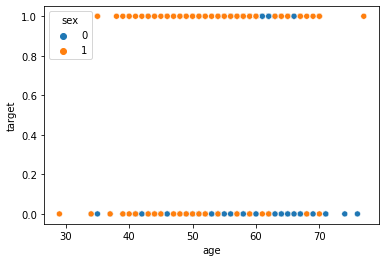

In [51]:
sns.scatterplot(x=df['age'],y=df['target'],hue=df['sex'])